# Verificaciones:

<img src="img/img13.jpeg" width="200">

1. **Aleatoriedad**: La muestra debe ser seleccionada aleatoriamente de la población y no debe estar sesgada. Esto significa que cada individuo de la población debe tener la misma probabilidad de ser seleccionado para formar parte de la muestra.

2. **Independencia**: Las observaciones en la muestra deben ser independientes entre sí. Esto significa que la presencia o ausencia de una observación no debe influir en la presencia o ausencia de otra observación.

3. **Tamaño de muestra**: El tamaño de la muestra debe ser lo suficientemente grande para que se puedan hacer inferencias sobre la población. El tamaño de muestra adecuado dependerá de la variabilidad de los datos y del nivel de precisión requerido.

4. **Distribución**: La distribución de la variable de interés debe ser conocida o aproximadamente conocida. En algunos casos, si el tamaño de muestra es lo suficientemente grande, se pueden relajar los supuestos de normalidad.

Es importante tener en cuenta que no cumplir con estos requisitos puede afectar la validez de la prueba de hipótesis y, por lo tanto, los resultados obtenidos pueden no ser confiables. 

## Analisis de distribucion:

La distribución de la variable de interés se puede evaluar utilizando métodos estadísticos como la prueba de normalidad de Shapiro-Wilk, la prueba de Kolmogorov-Smirnov y la prueba de Anderson-Darling. Estas pruebas evalúan si los datos se ajustan a una distribución normal. También se pueden utilizar técnicas gráficas como histogramas, gráficos de densidad y diagramas de caja para visualizar la distribución de los datos.

La distribución normal o distribución de Gauss representa la forma en la que se distribuyen en la naturaleza los diversos valores numéricos de las variables continuas, como pueden ser estatura, peso, etc.  

Variables continuas: son aquellas que pueden tomar cualquier valor entre dos intervalos o números. Por ejemplo, si necesitas escribir la estatura de un grupo de basquetbolistas, seguramente, no podrás utilizar los números 1 y 2, pero si las variables 1.78, 1.65, 1.45, porque la altura suele expresarse de esa manera.

son pruebas estadísticas que se utilizan para determinar si una muestra de datos se ajusta a una distribución normal (también conocida como distribución gaussiana). Estas pruebas son importantes porque muchas técnicas estadísticas asumen que los datos siguen una distribución normal, y si esta suposición no se cumple, los resultados pueden ser incorrectos o no válidos.

Los tests de normalidad más comunes y cuándo se utilizan:

- ***Prueba de Shapiro-Wilk***: es una prueba ampliamente utilizada para comprobar la normalidad de una muestra. Es especialmente adecuada para muestras pequeñas (menos de 50 observaciones), ya que es más sensible a las desviaciones de la normalidad en este tipo de muestras.

- ***Prueba de Kolmogorov-Smirnov***: esta prueba compara la función de distribución acumulativa (FDA) de la muestra con la función de distribución acumulativa teórica de una distribución normal. Es más adecuada para muestras más grandes, pero tiende a ser menos sensible a las desviaciones de la normalidad en comparación con la prueba de Shapiro-Wilk.

- *Prueba de Lilliefors*: es una variante de la prueba de Kolmogorov-Smirnov diseñada específicamente para muestras pequeñas cuando los parámetros de la distribución normal (media y varianza) son desconocidos y se estiman a partir de los datos.

- *Prueba de Anderson-Darling*: es otra prueba que compara la función de distribución acumulativa de la muestra con la función de distribución acumulativa teórica de una distribución normal. La prueba de Anderson-Darling da más peso a las colas de la distribución, lo que la hace más sensible a las desviaciones de la normalidad en las colas.

- ***Prueba de D'Agostino-Pearson***: esta prueba se basa en los coeficientes de asimetría (skewness) y curtosis de la muestra para evaluar la normalidad. Es más adecuada para muestras medianas y grandes.  
La curtosis es una medida estadística que determina el grado de concentración que presentan los valores de una variable alrededor de la zona central de la distribución de frecuencias.

- *Prueba de Jarque-Bera*: es otra prueba basada en la asimetría y curtosis de la muestra y es especialmente útil para muestras grandes.

La elección de la prueba de normalidad adecuada depende del tamaño de la muestra y de las características específicas de los datos en estudio. En general, se recomienda utilizar la prueba de Shapiro-Wilk para muestras pequeñas y una combinación de pruebas, como la prueba de Kolmogorov-Smirnov, Anderson-Darling y D'Agostino-Pearson, para muestras medianas y grandes.


In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
penguins = sns.load_dataset('penguins')

x = penguins['bill_length_mm'].dropna()

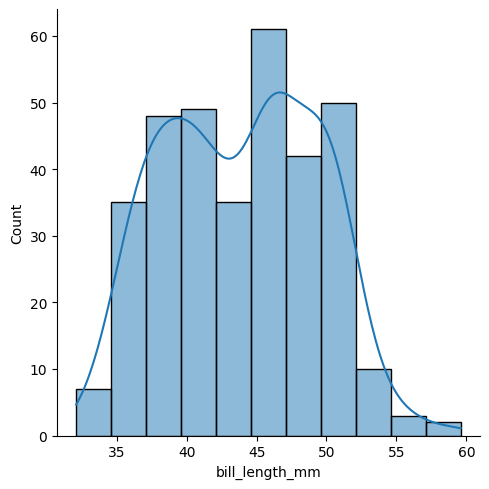

In [2]:
sns.displot(penguins["bill_length_mm"], kde=True);

### Shapiro-Wilk:

In [3]:
stats.shapiro(x)

ShapiroResult(statistic=0.9748551845550537, pvalue=1.1199218533874955e-05)

In [4]:
# Test de normalidad de Shapiro-Wilk
stat, p = stats.shapiro(x)
print('Shapiro-Wilk:')
print(f'Statistic : {stat:.4f}, p-value : {p:10f}')


Shapiro-Wilk:
Statistic : 0.9749, p-value :   0.000011


In [7]:
stats.shapiro(x)[0]

0.9748551845550537

In [5]:
def hypotesis_check(p_value):
    alpha=0.05
    # Decisión en función del p-valor y el nivel de significación
    if p_value < alpha:
        print("Rechazar la hipótesis nula: la muestra no parece seguir una distribución normal")
    else:
        print("No se puede rechazar la hipótesis nula: la muestra parece seguir una distribución normal")

In [6]:
hypotesis_check(p)

Rechazar la hipótesis nula: la muestra no parece seguir una distribución normal


### Kolmogorov-Smirnov:

In [7]:
adelie_x = penguins.loc[penguins.species == 'Adelie']
x = adelie_x['bill_length_mm'].dropna()

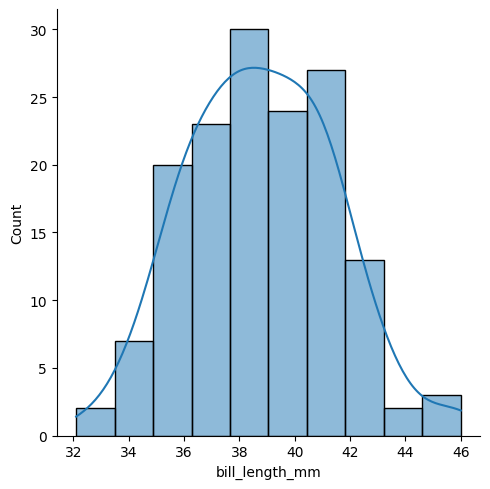

In [11]:
sns.displot(x, kde=True);

In [8]:
# Test de normalidad de Kolmogorov-Smirnov
stat, p = stats.kstest(x, 'norm')
print('\nKolmogorov-Smirnov:')
print(f'Statistic: {stat:.4f}, p-value: {p}')


Kolmogorov-Smirnov:
Statistic: 1.0000, p-value: 0.0


In [9]:
hypotesis_check(p)

Rechazar la hipótesis nula: la muestra no parece seguir una distribución normal


In [10]:
# Shapiro dice que es normal, pero el ruso dice que no. Con muestra grande, es mejor el ruso.

stat, p = stats.shapiro(x)
print('Shapiro-Wilk:')
print(f'Statistic : {stat:.4f}, p-value : {p}')
hypotesis_check(p)

Shapiro-Wilk:
Statistic : 0.9934, p-value : 0.7166136503219604
No se puede rechazar la hipótesis nula: la muestra parece seguir una distribución normal


### D'Agostino-Pearson:

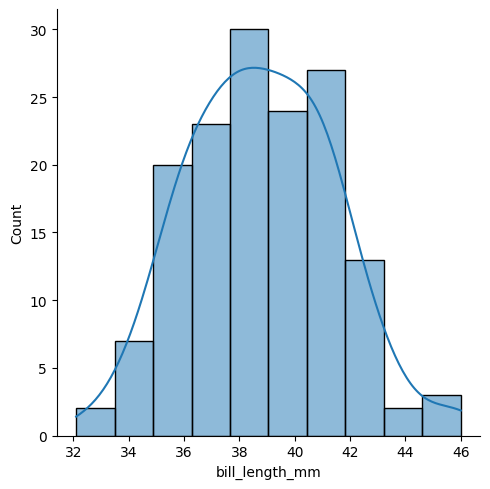

In [12]:
sns.displot(x, kde=True);

In [13]:
# Test de normalidad de D'Agostino-Pearson
stat, p = stats.normaltest(x)
print("\nD'Agostino-Pearson:")
print(f'Statistic: {stat:.4f}, p-value: {p:.4f}')


D'Agostino-Pearson:
Statistic: 0.7766, p-value: 0.6782


In [14]:
alpha=0.05

# Decisión en función del p-valor y el nivel de significación
if p < alpha:
    print("Rechazar la hipótesis nula: la muestra no parece seguir una distribución normal")
else:
    print("No se puede rechazar la hipótesis nula: la muestra parece seguir una distribución normal")

No se puede rechazar la hipótesis nula: la muestra parece seguir una distribución normal


## Correlación:

La independencia se puede evaluar mediante técnicas estadísticas como la correlación y la regresión. Si las observaciones no están relacionadas entre sí, entonces la correlación y la regresión serán cercanas a cero.

La correlación son pruebas estadísticas que se utilizan para medir la fuerza y dirección de la relación lineal entre dos variables. Estas pruebas son útiles para identificar si existe una asociación entre las variables y para evaluar la naturaleza de esa asociación.

Los tests de correlación más comunes y cuándo se utilizan:

- ***Coeficiente de correlación de Pearson*** (r de Pearson): es el test de correlación más utilizado y mide la relación lineal entre dos variables continuas. La correlación de Pearson es apropiada cuando ambas variables siguen una distribución normal y la relación entre ellas es lineal. El coeficiente varía entre -1 y 1, donde -1 indica una correlación negativa perfecta, 1 indica una correlación positiva perfecta y 0 indica que no hay correlación.

- ***Coeficiente de correlación de Spearman*** (rho de Spearman): es una medida de correlación no paramétrica que evalúa la relación monótona entre dos variables. No requiere que los datos sigan una distribución normal y es menos sensible a la presencia de valores extremos que la correlación de Pearson. Es apropiado cuando al menos una de las variables es ordinal (categórica con un orden) o cuando la relación entre las variables no es lineal pero sí monótona.

- ***Coeficiente de correlación de Kendall*** (tau de Kendall): también es una medida de correlación no paramétrica que evalúa la relación monótona entre dos variables. Es similar al coeficiente de correlación de Spearman, pero es especialmente útil en situaciones en las que hay empates en los datos (observaciones con valores idénticos) o cuando se trabaja con muestras pequeñas.

La elección del test de correlación adecuado depende de la naturaleza de las variables y de la relación que se espera encontrar entre ellas. Se recomienda utilizar el coeficiente de correlación de Pearson para variables continuas con una relación lineal y una distribución normal, mientras que se aconseja utilizar el coeficiente de correlación de Spearman o de Kendall cuando se trabaja con variables ordinales o con relaciones no lineales.

In [15]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

iris = sns.load_dataset('iris')
penguins = sns.load_dataset('penguins')

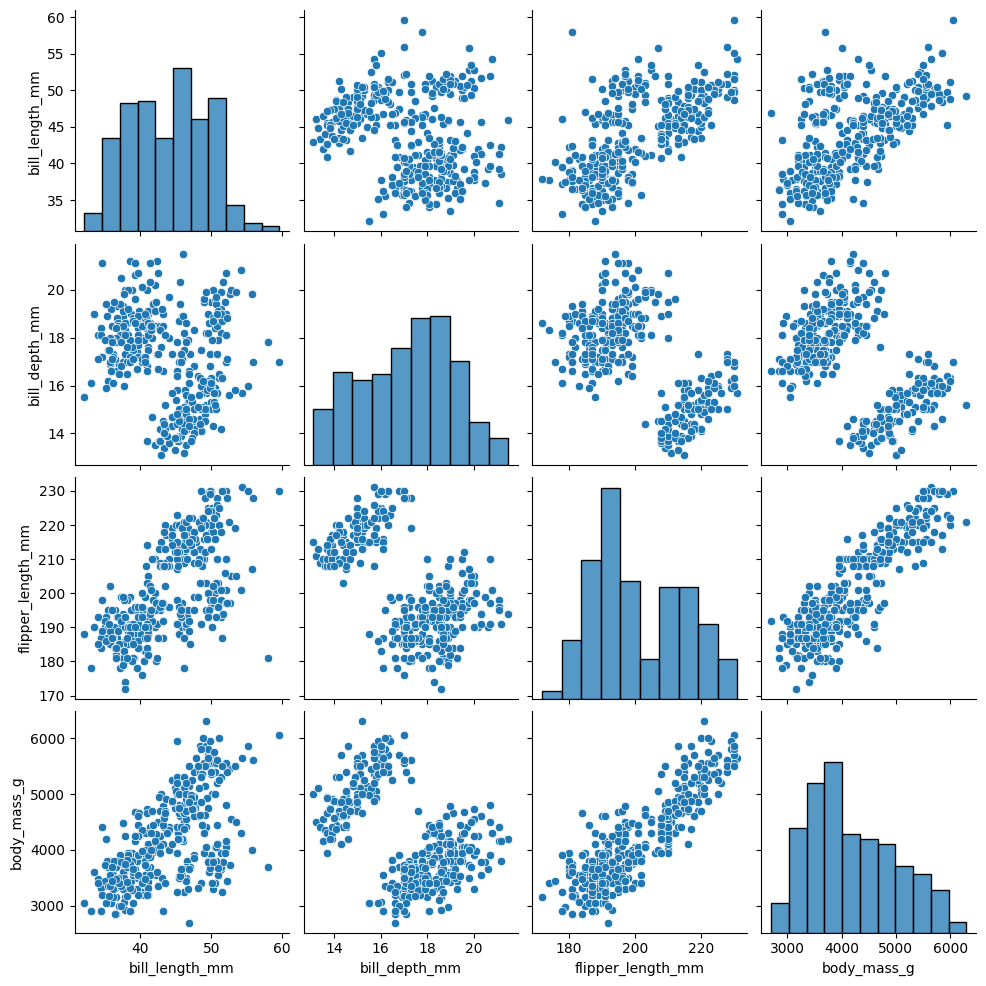

In [16]:
# Matriz de dispersión
sns.pairplot(penguins)
plt.show()

### Coeficiente de correlación de Pearson:

El resultado es un número que oscila entre -1 y 1. Un valor de 1 indica una correlación perfecta positiva, un valor de 0 indica que no hay correlación y un valor de -1 indica una correlación perfecta negativa.

In [17]:
from scipy.stats import pearsonr

In [18]:
pearsonr(penguins["flipper_length_mm"].dropna(), penguins["body_mass_g"].dropna())

(0.8712017673060115, 4.370680962998791e-107)

La función pearsonr toma las dos variables de interés como argumentos y devuelve el coeficiente de correlación de 0,87 que indica que existe una fuerte relación positiva entre la longitud de las aletas y la masa corporal, y un valor p <0,05 que significa que el resultado es estadísticamente significativo.

Ahora puedes llegar a una conclusión, es probable que los pingüinos con mayor masa corporal tengan aletas más largas que los de menor masa corporal.

### Coeficiente de correlación de Spearman:

Este coeficiente mide la relación entre dos variables en términos de su posición en la clasificación. Un valor de 1 indica una correlación perfecta positiva, un valor de 0 indica que no hay correlación y un valor de -1 indica una correlación perfecta negativa.

In [19]:
stats.spearmanr(penguins["flipper_length_mm"], penguins["body_mass_g"],nan_policy='omit')

SpearmanrResult(correlation=0.8399741230312998, pvalue=2.7632189971800357e-92)

In [20]:
penguins.corr(method="spearman")

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.221749,0.672772,0.583800
bill_depth_mm,-0.221749,1.000000,-0.523267,-0.432372
flipper_length_mm,0.672772,-0.523267,1.000000,0.839974
body_mass_g,0.583800,-0.432372,0.839974,1.000000


<AxesSubplot:>

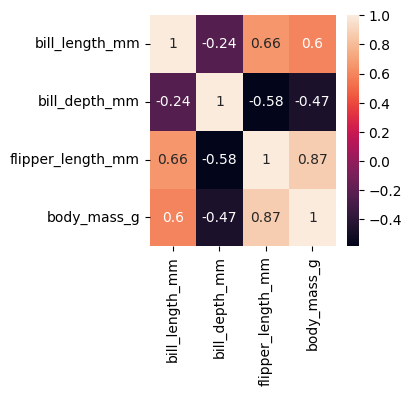

In [21]:
plt.figure(figsize=(3,3))
sns.heatmap(penguins.corr(), annot=True)


### Coeficiente de correlación de Kendall:

Es una medida no paramétrica de correlación utilizada para evaluar la asociación entre dos variables ordinales. Su valor varía entre -1 y 1, donde 1 indica una correlación positiva perfecta, 0 indica que no hay correlación y -1 indica una correlación negativa perfecta.

In [22]:
numeric_cols = penguins.select_dtypes(include=np.number)
numeric_cols.corr(method='kendall')

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.122850,0.483345,0.433359
bill_depth_mm,-0.122850,1.000000,-0.281894,-0.195070
flipper_length_mm,0.483345,-0.281894,1.000000,0.660467
body_mass_g,0.433359,-0.195070,0.660467,1.000000


In [23]:
from scipy.stats import kendalltau

In [24]:
corr, _= kendalltau(penguins['bill_depth_mm'].dropna(), penguins["body_mass_g"].dropna())
corr

-0.19506984612877404

## Regresión:

En estadistica, la regresión lineal es un modelo de aproximación de relación entre una variable dependiente con una o varias variables independientes.  
En un analisis de regresion consideramos fenomenos de interes, y tenemos un número de obervaciones. Cada observación tiene 2 o mas variables.  asumimos que al menos una tiene que ser una variable dependiente, y tratamos de establecer una relación entre ellas.  
____________________________________________________
- ***Regresión lineal simple***: modela la relación entre una variable dependiente y una variable independiente.

- ***Regresión lineal múltiple***: modela la relación entre una variable dependiente y varias variables independientes.

- ***Regresión logística***: modela la probabilidad de una variable categórica en función de una o más variables independientes.

In [25]:
import seaborn as sns

In [26]:
from scipy import stats
from scipy import interpolate
import pandas as pd
import numpy as np

La variable continua es nuestro target (variable dependiente). En este ejemplo usaremos dos variables : flipper length la usaremos como la independiente, y el body mass sera nustro target. En este ejemplo corto queremos predecir el body mass usando el flipper length.  

In [27]:
feature_name = 'flipper_length_mm'
target_column = 'body_mass_g'

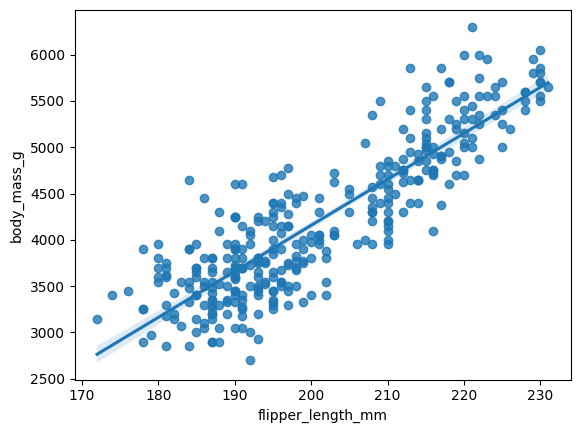

In [28]:
_= sns.regplot(data = penguins, x = feature_name,  y = target_column)

La prueba de hipótesis la usamos para determinar si el modelo de regresión es significativo;en otras palabras, ¿el valor de X ayuda a predecir el valor esperado Y?
En este gráfico podemos confirmar que nuestro datos tiene lo necesario para un modelo de predicción.

**Ordinary Least Squares(OLS)**, <strong>OLS </strong> :  es una técnica de regresión lineal utilizada para encontrar la línea que mejor se ajusta a un conjunto de puntos de datos. Es un método popular porque es fácil de usar y produce resultados decentes.  
**La regresión por mínimos cuadrados ordinarios (OLS)** es el método se basa en la minimización de la suma de los residuos al cuadrado entre los valores reales y los predichos.   
<br>  
 
  

In [31]:
#pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [29]:
#Para realizar esto importartemos el ols.  
from statsmodels.formula.api import ols

> Vamos a ver si la body mass de los pinguinos puede ser predicible usando la variable flipper length. ya que sabemos por el gráfico que tiene un alta correlación.

In [30]:
formula = 'body_mass_g ~ flipper_length_mm'
lm = ols(formula, penguins).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1071.
Date:                Tue, 30 May 2023   Prob (F-statistic):          4.37e-107
Time:                        09:38:07   Log-Likelihood:                -2528.4
No. Observations:                 342   AIC:                             5061.
Df Residuals:                     340   BIC:                             5069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5780.8314    305.81



- **R squared and Adjusted R-Squared** :  R-cuadrado: Mide la variación de un modelo de regresión. La R-cuadrado aumenta o permanece igual cuando se añaden nuevos predictores al modelo. R-cuadrado ajustado: Mide la variación de un modelo de regresión múltiple y ayuda a determinar la bondad del ajuste.
<br>  

- **Coefficient of the predictor variable**  flipper lentgh :  que es 49.6856  esto nos dice que por cada 1mm de incremento del flipper length la body masss tendra un incremente de 49.6856 
<br>  

- P values P>|t|, variables independientes con valores inferiores a 0,05 indica que la variable predictora es significativa


>En nuestro dataset de los pinguinos vamos a predecir la body mass en base al largo del pico y de la profundidad del mismo.

### Regresión Multiple

In [34]:
formula = 'body_mass_g ~ flipper_length_mm + bill_length_mm + bill_depth_mm'
lm = ols(formula, penguins).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     359.7
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          8.19e-105
Time:                        15:01:18   Log-Likelihood:                -2526.7
No. Observations:                 342   AIC:                             5061.
Df Residuals:                     338   BIC:                             5077.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6424.7647    561.46

## Aleatoriedad: 

Para saber si una muestra es aleatoria se pueden utilizar *diferentes técnicas estadísticas*. Una forma de comprobarlo es utilizando la **prueba de bondad de ajuste [chi-cuadrado](4_Test-no-parametricos.ipynb)**, que permite comparar una distribución de frecuencias observadas con una distribución de frecuencias esperadas. ***Si ambas distribuciones son similares, entonces se puede decir que la muestra es aleatoria.***

Otra técnica que se utiliza para verificar si una muestra es aleatoria es la **prueba de independencia chi-cuadrado**. Esta prueba se utiliza para comprobar si existe relación entre dos variables categóricas. ***Si no hay relación entre las variables, se puede decir que la muestra es aleatoria.***

También es posible realizar un análisis exploratorio de los datos para ver si hay algún patrón o tendencia que indique que la muestra no es aleatoria. Esto se puede hacer a través de gráficos y medidas estadísticas como la media, la mediana y la desviación estándar. Si los valores son similares a los esperados para una muestra aleatoria, entonces se puede decir que la muestra es aleatoria.

De esta prueba podemos ver que R squared se mantiene pero La profundidad y la longitud del pico no resultaron significativas, lo que significa que estas dos variables no pueden predecir la masa corporal de un pingüino.

## Igualdad de varianza (homocedasticidad):

La homocedasticidad se refiere a la igualdad de varianza entre los grupos en un conjunto de datos. 

Cuando se realiza un análisis estadístico, uno de los supuestos es que las muestras provienen de poblaciones con la misma varianza. 

La falta de homocedasticidad puede dar lugar a resultados inexactos en las pruebas estadísticas, como el análisis de varianza (ANOVA) o el test t de Student.

Existen diferentes `pruebas estadísticas` que se pueden utilizar para `verificar la homocedasticidad` de una muestra. Algunas de las más comunes son:

- ***Prueba de Bartlett***: Se utiliza cuando los datos provienen de poblaciones normales y se desea verificar si las varianzas de las muestras son iguales o no. Es sensible a la normalidad y a la presencia de valores atípicos.

- ***Prueba de Levene***: Similar a la prueba de Bartlett, pero es más robusta ante la presencia de datos no normales o valores atípicos. Se utiliza para verificar si las varianzas de dos o más muestras son iguales o no.

- ***Prueba de Fligner-Killeen***: Es una prueba no paramétrica que se utiliza para verificar la homogeneidad de las varianzas en dos o más grupos. Es menos sensible a la no normalidad y a los valores atípicos que la prueba de Bartlett.

En las tres pruebas se mantiene la hipotesis: 

- `H0`: Es homocedástica

- H1: No es homocedástica (es heterocedástica) 

### Prueba Bartlett: 

In [47]:
from scipy.stats import bartlett
import seaborn as sns

# Cargar el dataset de seaborn "iris"
iris = sns.load_dataset("iris")

# Dividir la muestra en tres grupos basados en la especie de la flor
group1 = iris[iris["species"] == "setosa"]["sepal_width"]
group2 = iris[iris["species"] == "versicolor"]["sepal_width"]
group3 = iris[iris["species"] == "virginica"]["sepal_width"]

# Realizar la prueba de Bartlett
stat, p_value = bartlett(group1, group2, group3)

print(f"Estadístico de prueba: {stat}")
print(f"Valor p: {p_value}")

Estadístico de prueba: 2.0910752014392338
Valor p: 0.35150280041580323


In [55]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [56]:
# Selección del nivel de significación
alpha = 0.05 

In [57]:
# Decisión en función del p-valor y el nivel de significación

if p_value < alpha:
    print("Rechazar la hipótesis nula: heterocedástica")
else:
    print("No se puede rechazar la hipótesis nula: homocedástica")


No se puede rechazar la hipótesis nula: homocedástica


### Prueba de Levene:

In [58]:
from scipy.stats import levene
import seaborn as sns

# Cargar el dataset de seaborn "tips"
tips = sns.load_dataset("tips")


In [59]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [60]:
# Dividir la muestra en dos grupos basados en el valor de la variable "sex"
group1 = tips[tips["sex"] == "Male"]["tip"]
group2 = tips[tips["sex"] == "Female"]["tip"]

# Realizar la prueba de Levene
stat, p_value = levene(group1, group2)

print(f"Estadístico de prueba: {stat}")
print(f"Valor p: {p_value}")

Estadístico de prueba: 1.9909710178779405
Valor p: 0.1595236359896614


In [61]:
# Selección del nivel de significación
alpha = 0.05 

In [62]:
# Decisión en función del p-valor y el nivel de significación

if p_value < alpha:
    print("Rechazar la hipótesis nula: heterocedástica")
else:
    print("No se puede rechazar la hipótesis nula: homocedástica")


No se puede rechazar la hipótesis nula: homocedástica


### Prueba de Fligner-Killeen:

In [43]:
from scipy.stats import fligner
import seaborn as sns

# Cargar el dataset de seaborn "tips"
tips = sns.load_dataset("tips")


In [44]:
# Dividir la muestra en dos grupos basados en el valor de la variable "sex"
group1 = tips[tips["sex"] == "Male"]["tip"]
group2 = tips[tips["sex"] == "Female"]["tip"]

# Realizar la prueba de Fligner-Killeen
stat, p_value = fligner(group1, group2)

print(f"Estadístico de prueba: {stat}")
print(f"Valor p: {p_value}")

Estadístico de prueba: 1.6183029033640117
Valor p: 0.20332858592898514


In [45]:
# Selección del nivel de significación
alpha = 0.05 

In [46]:
# Decisión en función del p-valor y el nivel de significación

if p_value < alpha:
    print("Rechazar la hipótesis nula: heterocedástica")
else:
    print("No se puede rechazar la hipótesis nula: homocedástica")


No se puede rechazar la hipótesis nula: homocedástica
